In [147]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from matplotlib import style
#style.use()

In [2]:
# dataset = arff.loadarff(open('chronic_kidney_disease_full.arff', 'rb'))
# data = np.array(dataset['data'])

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

### Starting With Conventional Data Cleaning Procedures

In [5]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
# drop roow if thay row is cmpetey empty
df.dropna(axis='index', how='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
# filing 9 NAN indices of 'age' col with its average value
avgage = round(df['age'].mean(), 2)
df['age'].fillna(avgage, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
# Similarly filing 12 NAN indices of 'bp' col with its average value
avgbp = round(df['bp'].mean(), 2)
df['bp'].fillna(avgbp, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
# filing 47 NAN indices of 'sg' col with its average value
avgsg = round(df['sg'].mean(), 2)
df['sg'].fillna(avgsg, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Checking features data types in the dataframe

In [10]:
# df['al'].dtypes
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [11]:
# filing 46 NAN indices of 'al' col with its average value
avgal = round(df['al'].mean(), 2)
df['al'].fillna(avgal, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
# filing 49 NAN indices of 'su' col with its average value
avgsu = round(df['su'].mean(), 2)
df['su'].fillna(avgsu, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
df['rbc'].unique().tolist()

[nan, 'normal', 'abnormal']

In [14]:
df.drop(['rbc'], axis=1, inplace=True)

In [15]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [16]:
df['ba'].unique()

array(['notpresent', 'present', nan], dtype=object)

Droping initially less important Columns

In [17]:
df.drop(['pc', 'pcc', 'ba'], axis=1, inplace=True)

In [18]:
df.shape

(400, 22)

In [19]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [20]:
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [21]:
# Let's fill again 44 NAN indices of numeric 'bgr' col with its average value
avgbgr = round(df['bgr'].mean(), 2)
df['bgr'].fillna(avgbgr, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [22]:
# filling 19 NAN indices of col 'bu' with its average value
avgbu = round(df['bu'].mean(), 2)
df['bu'].fillna(avgbu, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [23]:
# filling 17 NAN indices of col 'sc' with its average value
avgsc = round(df['sc'].mean(), 2)
df['sc'].fillna(avgsc, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [24]:
# again filling 87 NAN indices of col 'sod' with its average value
avgsod = round(df['sod'].mean(), 2)
df['sod'].fillna(avgsod, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [25]:
# filling 88 NAN indices of col 'pot' with its average value
avgpot = round(df['pot'].mean(), 2)
df['pot'].fillna(avgpot, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [26]:
# filling 52 NAN indices of col 'hemo' with its average value
avghemo = round(df['hemo'].mean(), 2)
df['hemo'].fillna(avghemo, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [27]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [28]:
df['pcv'].replace('\t?', '0', inplace=True)

In [29]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [30]:
df['pcv'].replace('\t43', '43', inplace=True)

In [31]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [32]:
df['pcv'].isna().sum()

70

In [33]:
df['pcv'].dtypes

dtype('O')

In [34]:
df['pcv'] = df['pcv'].astype(float)

In [35]:
df['pcv'].dtypes

dtype('float64')

In [36]:
df['pcv'].isna().sum()

70

In [37]:
# Now, filling 70 NAN indices of col 'pcv' with its average value
avgpcv = round(df['pcv'].mean(), 2)
df['pcv'].fillna(avgpcv, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [38]:
df['pcv'].unique()

array([44.  , 38.  , 31.  , 32.  , 35.  , 39.  , 36.  , 33.  , 29.  ,
       28.  , 38.77, 16.  , 24.  , 37.  , 30.  , 34.  , 40.  , 45.  ,
       27.  , 48.  ,  0.  , 52.  , 14.  , 22.  , 18.  , 42.  , 17.  ,
       46.  , 23.  , 19.  , 25.  , 41.  , 26.  , 15.  , 21.  , 43.  ,
       20.  , 47.  ,  9.  , 49.  , 50.  , 53.  , 51.  , 54.  ])

In [39]:
df['pcv'].replace(0, avgpcv, inplace=True)

In [40]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [41]:
df['wc'].replace("\t?", "0", inplace=True)

In [42]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '0', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [43]:
df['wc'].replace("\t6200", "6200", inplace=True)

In [44]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '\t8400', '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100', '0',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [45]:
df['wc'].replace("\t8400", "8400", inplace=True)

In [46]:
df['wc'].dtypes

dtype('O')

In [47]:
df['wc'] = df['wc'].astype(float)

In [48]:
df['wc'].dtypes

dtype('float64')

In [49]:
df['wc'].isna().sum()

105

In [50]:
# Again, filling 105 NAN indices of col 'wc' with its average value
avgwc = round(df['wc'].mean(), 2)
df['wc'].fillna(avgwc, inplace=True)
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [53]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  , 12300.  , 16700.  ,  2600.  , 26400.  ,
        8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  , 15700.  ,
        4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,  9900.  ,
        5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100.  ,  6600

In [52]:
df['wc'].replace(0, avgwc, inplace=True)

In [54]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  , 12300.  , 16700.  ,  2600.  , 26400.  ,
        8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  , 15700.  ,
        4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,  9900.  ,
        5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100.  ,  6600

In [55]:
df['wc'].dtypes

dtype('float64')

In [56]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [57]:
df['rc'].replace('\t?', '0', inplace=True)

In [58]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '0', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [59]:
df['rc'].dtypes

dtype('O')

In [60]:
df['rc'] = df['rc'].astype(float)

In [61]:
df['rc'].dtypes

dtype('float64')

In [62]:
df['rc'].dtypes

dtype('float64')

In [63]:
# Now, filling 130 NAN indices of col 'rc' with its average value
avgrc = round(df['rc'].mean(), 2)
df['rc'].fillna(avgrc, inplace=True)
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [64]:
df['rc'].unique()

array([5.2 , 4.69, 3.9 , 4.6 , 4.4 , 5.  , 4.  , 3.7 , 3.8 , 3.4 , 2.6 ,
       2.8 , 4.3 , 3.2 , 3.6 , 4.1 , 4.9 , 2.5 , 4.2 , 4.5 , 3.1 , 4.7 ,
       3.5 , 6.  , 2.1 , 5.6 , 2.3 , 2.9 , 2.7 , 8.  , 3.3 , 3.  , 2.4 ,
       4.8 , 0.  , 5.4 , 6.1 , 6.2 , 6.3 , 5.1 , 5.8 , 5.5 , 5.3 , 6.4 ,
       5.7 , 5.9 , 6.5 ])

In [65]:
df['rc'].replace(0, avgrc, inplace=True)

In [166]:
# df[['ane']]

In [66]:
df['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

Here remaining 'htn', 'dm', 'cad', 'appet', 'pe', 'ane' all columns contain yes or no, good or bad binary types of values, therefore I think these attributes are less significant for the target. If requre to achive height accurecy we may use them to build our model later. But for now lets drop these attributes.

In [67]:
df.drop(['htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis=1, inplace=True)

In [68]:
df.shape

(400, 16)

In [69]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,ckd
1,1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,ckd
2,2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,ckd
3,3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,ckd
4,4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,ckd


In [70]:
# converting Categorical 'classification' col to Numeric value
df['classification'] = np.where(df['classification']=='ckd', 1, 0)

In [71]:
# if ckd then output is 1 - and if not ckd then output is 0
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1
1,1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,1
2,2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,1
3,3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1
4,4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,1


In [157]:
import seaboarn as sns

ModuleNotFoundError: No module named 'seaboarn'

In [73]:
sns.pairplot(df, hue='classification', markers=["o", "s", "D"])

NameError: name 'sns' is not defined

In [74]:
df.isna().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
classification    False
dtype: bool

### So now our dataset is all clean and we are good to build our ML and DL Model

In [76]:
# defining Independent X
X = df.iloc[:, 1:15]
X.head(2)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.02,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20
1,7.0,50.0,1.02,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69


In [83]:
# defining dependent y
y = df.iloc[:, -1]
y.head(2)

0    1
1    1
Name: classification, dtype: int32

In [84]:
y.value_counts()

1    248
0    152
Name: classification, dtype: int64

among 400 cases in the dataset 248 cases are ckd, and 152 cases are not ckd

In [85]:
y.dtypes

dtype('int32')

In [86]:
# converting y to numpy 1D array
y = y.values

In [87]:
type(y)

numpy.ndarray

In [90]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Scaling data to standard deviation range to reduce computing and increase model performence

In [91]:
scaledX = StandardScaler()
X = scaledX.fit_transform(X)

In [110]:
X

array([[-0.20545916,  0.26233629,  0.4214856 , ...,  0.63085894,
        -0.23751956,  0.59367703],
       [-2.62380543, -1.96658231,  0.4214856 , ..., -0.10615092,
        -0.95177825, -0.01396992],
       [ 0.62031762,  0.26233629, -1.4210744 , ..., -0.96599575,
        -0.35656268, -0.01396992],
       ...,
       [-2.32888515,  0.26233629,  0.4214856 , ...,  1.24503383,
        -0.71369202,  0.83196995],
       [-2.03396488, -1.22360944,  1.3427656 , ...,  1.49070378,
        -0.47560579,  1.42770226],
       [ 0.38438139,  0.26233629,  1.3427656 , ...,  1.73637373,
        -0.63432995,  1.66599518]])

In [92]:
X.shape

(400, 14)

In [93]:
# Spltting X, y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [94]:
X_train.shape

(360, 14)

## KNN Clasification Model

In [95]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [96]:
pred = knn.predict(X_test)

In [97]:
pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [144]:
# Checking Model prediction accurecy
knn_acc = round(accuracy_score(y_test, pred)*100, 2)
print(f'KNN Accurecy {knn_acc}%')

KNN Accurecy 97.5%


Tuning KNN Model Accurecy using 10-fold cross validation, n_neighbors

In [99]:
from sklearn.model_selection import cross_val_score

accurecy = []
for n in range(1, 20):
	knn = KNeighborsClassifier(n_neighbors=n)
	acc = cross_val_score(knn, X, y, cv=11)
	accurecy.append(round(acc.mean()*100, 2))

In [100]:
accurecy

[95.49,
 94.72,
 96.25,
 95.73,
 96.74,
 95.99,
 96.49,
 96.74,
 97.24,
 96.24,
 96.49,
 96.49,
 96.25,
 95.99,
 96.5,
 95.99,
 96.25,
 95.99,
 96.5]

## Random Forest Classifier

In [107]:
rndf = RandomForestClassifier(max_depth=10, n_estimators=20)

In [108]:
rndf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

In [109]:
rndf_pred = rndf.predict(X_test)

In [110]:
rndf_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [111]:
y_test

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [112]:
# Checking Model prediction accurecy
rndf_acc = round(accuracy_score(y_test, rndf_pred)*100, 2)
print(f'Random Forest Accurecy: {rndf_acc}%')

Random Forest Accurecy: 100.0%


#### Tuning Model Accurecy using Cross Validation and n_estimators

In [114]:
from sklearn.model_selection import cross_val_score

rndf_accurecy = []
for n in range(10, 40):
	rndf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rndf, X, y, cv=20)
	rndf_accurecy.append(round(acc.mean()*100, 2))

In [115]:
rndf_accurecy

[97.75,
 98.0,
 97.75,
 97.75,
 98.5,
 97.5,
 98.25,
 98.0,
 97.5,
 98.25,
 97.75,
 98.5,
 98.0,
 98.0,
 98.0,
 98.0,
 98.25,
 97.75,
 97.5,
 98.0,
 98.0,
 97.25,
 98.25,
 98.0,
 98.25,
 98.0,
 98.25,
 98.25,
 98.25,
 98.25]

## SVM Model

In [116]:
from sklearn.svm import SVC

In [117]:
svc = SVC(C=1.5)

In [118]:
svc.fit(X_train, y_train)

SVC(C=1.5)

In [119]:
svc_pred = svc.predict(X_test)

In [120]:
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accurecy: {svc_acc}%')

SVM Accurecy: 100.0%


## Gaussian Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [122]:
gnb.fit(X_train, y_train)

GaussianNB()

In [123]:
gnb_pred = gnb.predict(X_test)

In [124]:
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, 2)
print(f'GNB Model Accurecy: {gnb_acc}%')

GNB Model Accurecy: 92.5%


## DL Model Using ANN

In [125]:
from keras.models import Sequential
from keras.layers import Dense

In [132]:
ann = Sequential()
ann.add(Dense(32, activation='relu', input_dim = 14))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [133]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [138]:
ann.fit(X_train, y_train, batch_size=8, epochs=30)

Epoch 1/30
45/45 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9833
Epoch 2/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9861
Epoch 3/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9833
Epoch 4/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9833
Epoch 5/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9833
Epoch 6/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9833
Epoch 7/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9833
Epoch 8/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9861
Epoch 9/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9833
Epoch 10/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9861
Epoch 11/30
45/45 [

In [139]:
ann_pred = ann.predict(X_test)

In [140]:
ann_pred = [1 if pred> 0.5 else 0 for pred in ann_pred]
ann_pred

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1]

In [141]:
ann_acc = round(accuracy_score(y_test, ann_pred)*100, 2)
print(f'ANN Model Accurecy: {ann_acc}%')

ANN Model Accurecy: 100.0%


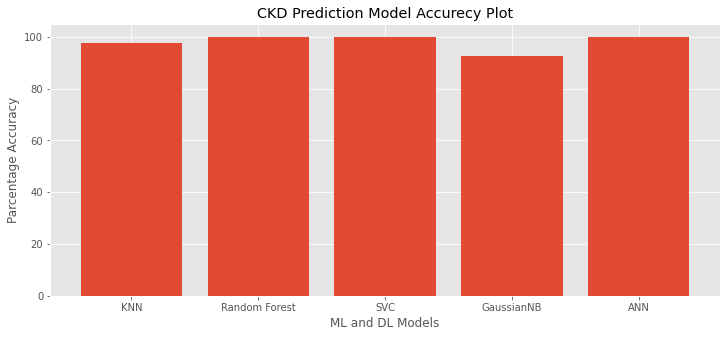

In [160]:
plt.figure(figsize=(12, 5))
model = ['KNN', 'Random Forest', 'SVC', 'GaussianNB', 'ANN']
model_acc = [knn_acc, rndf_acc, svc_acc, gnb_acc, ann_acc]
# xax = [1, 2, 3, 4, 5]

plt.title('CKD Prediction Model Accurecy Plot')
plt.bar(model, model_acc)
plt.xticks(model)
plt.ylabel('Parcentage Accuracy')
plt.xlabel('ML and DL Models')
# plt.legend()

# plt.savefig('figName.png', dpi=300)
plt.show()